# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
df = pd.read_csv('Maintenance.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
df.isnull().sum().sum()

0

Dropping UDI & Product ID

In [8]:
df.drop(['UDI','Product ID'], axis = 1, inplace = True)

In [9]:
df["Type"] = df["Type"].replace("L",0)
df["Type"] = df["Type"].replace("M",1)
df["Type"] = df["Type"].replace("H",2)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# L, M, or H for low (50% of all products), medium (30%) and high (20%)

In [10]:
df = df.rename(columns={"Air temperature [K]": "air_temp", "Process temperature [K]": "process_temp",
                   "Rotational speed [rpm]" : "rot_speed", "Tool wear [min]" : "tool_wear",
                   "Machine failure" : "failure","Torque [Nm]" : "torque"})
df.head()

,Type,air_temp,process_temp,rot_speed,torque,tool_wear,failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [11]:
df['failure'].value_counts()

0    9661
1     339
Name: failure, dtype: int64

In [12]:
df['Type'].value_counts()

0    6000
1    2997
2    1003
Name: Type, dtype: int64

In [13]:
df['tool_wear'].value_counts()

0      120
2       69
5       63
7       58
59      58
      ... 
237      1
239      1
241      1
251      1
253      1
Name: tool_wear, Length: 246, dtype: int64

In [14]:
df['TWF'].value_counts()

0    9954
1      46
Name: TWF, dtype: int64

In [15]:
df['HDF'].value_counts()

0    9885
1     115
Name: HDF, dtype: int64

In [16]:
df['PWF'].value_counts()

0    9905
1      95
Name: PWF, dtype: int64

In [17]:
df['OSF'].value_counts()

0    9902
1      98
Name: OSF, dtype: int64

In [18]:
df['RNF'].value_counts()

0    9981
1      19
Name: RNF, dtype: int64

# Visualizing Data

Machine Failure Count :
 0    9661
1     339
Name: failure, dtype: int64


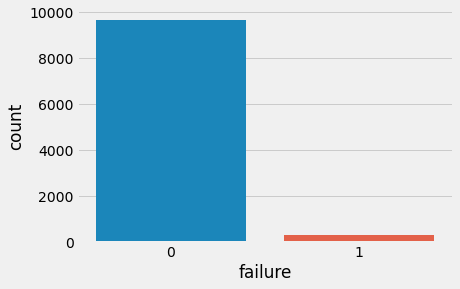

In [19]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='failure', data=df)
print("Machine Failure Count :\n",df['failure'].value_counts())

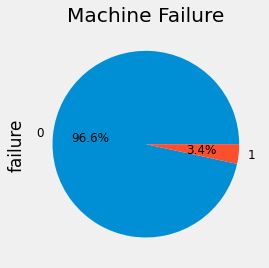

In [20]:
ax = (df['failure'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', fontsize=12)                                                                           
ax.set_title('Machine Failure')
plt.show()

<AxesSubplot:ylabel='torque'>

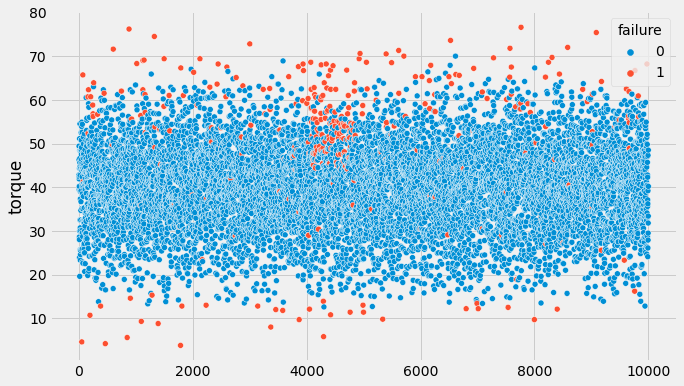

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot( x=range(1,10001),y=df.torque,hue=df.failure)

<AxesSubplot:ylabel='tool_wear'>

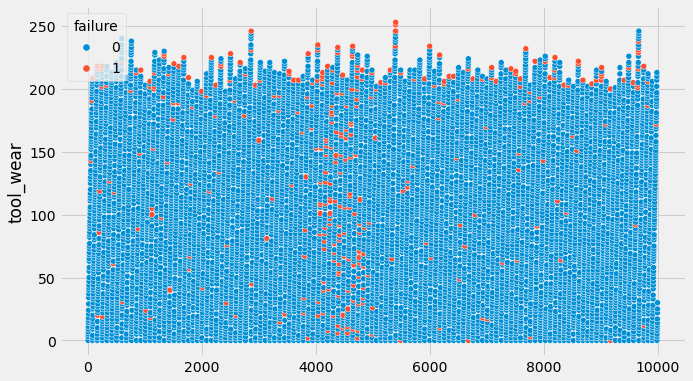

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot( x=range(1,10001),y=df.tool_wear,hue=df.failure)

<AxesSubplot:ylabel='rot_speed'>

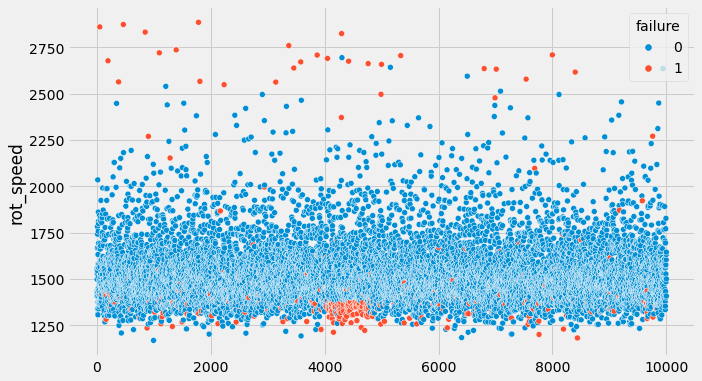

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot( x=range(1,10001),y=df.rot_speed,hue=df.failure)

<AxesSubplot:xlabel='Type', ylabel='count'>

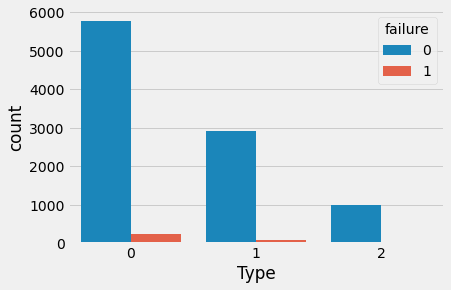

In [24]:
sns.countplot(x="Type", hue="failure", data=df)

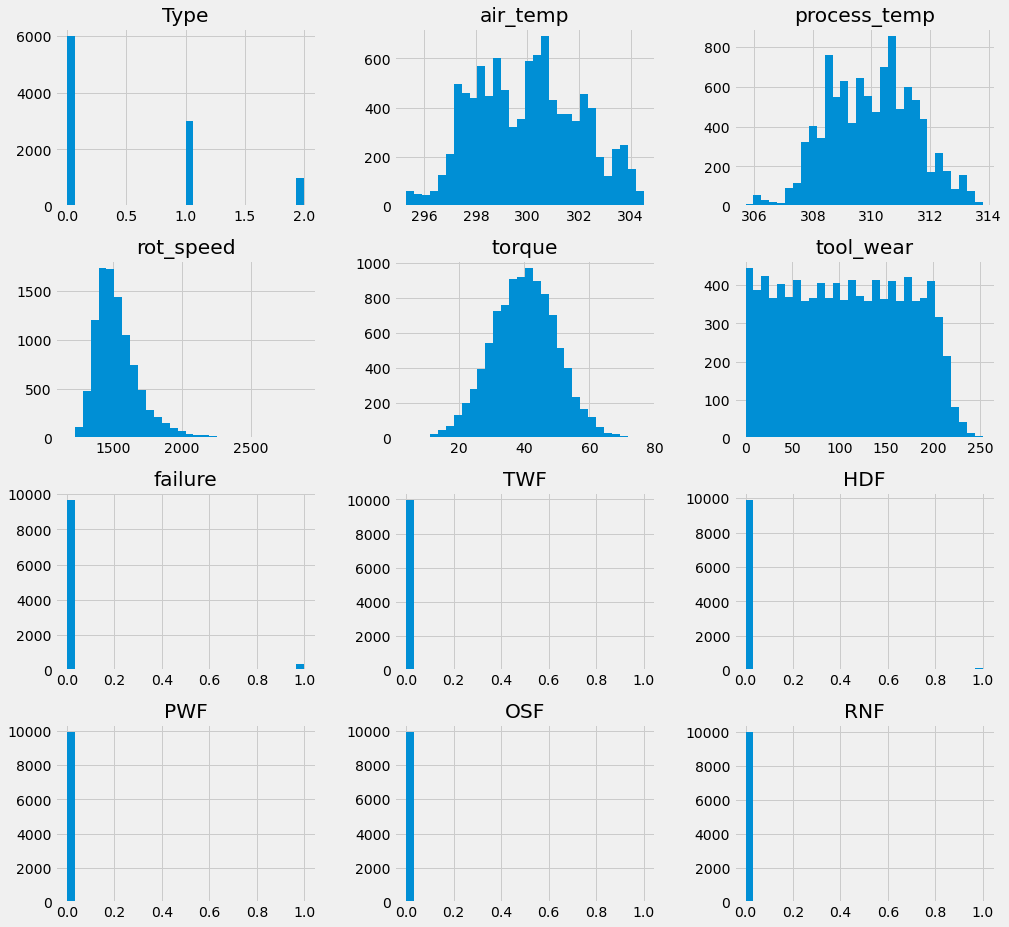

In [25]:
df.hist(bins=30,figsize=(15,15))
plt.show()

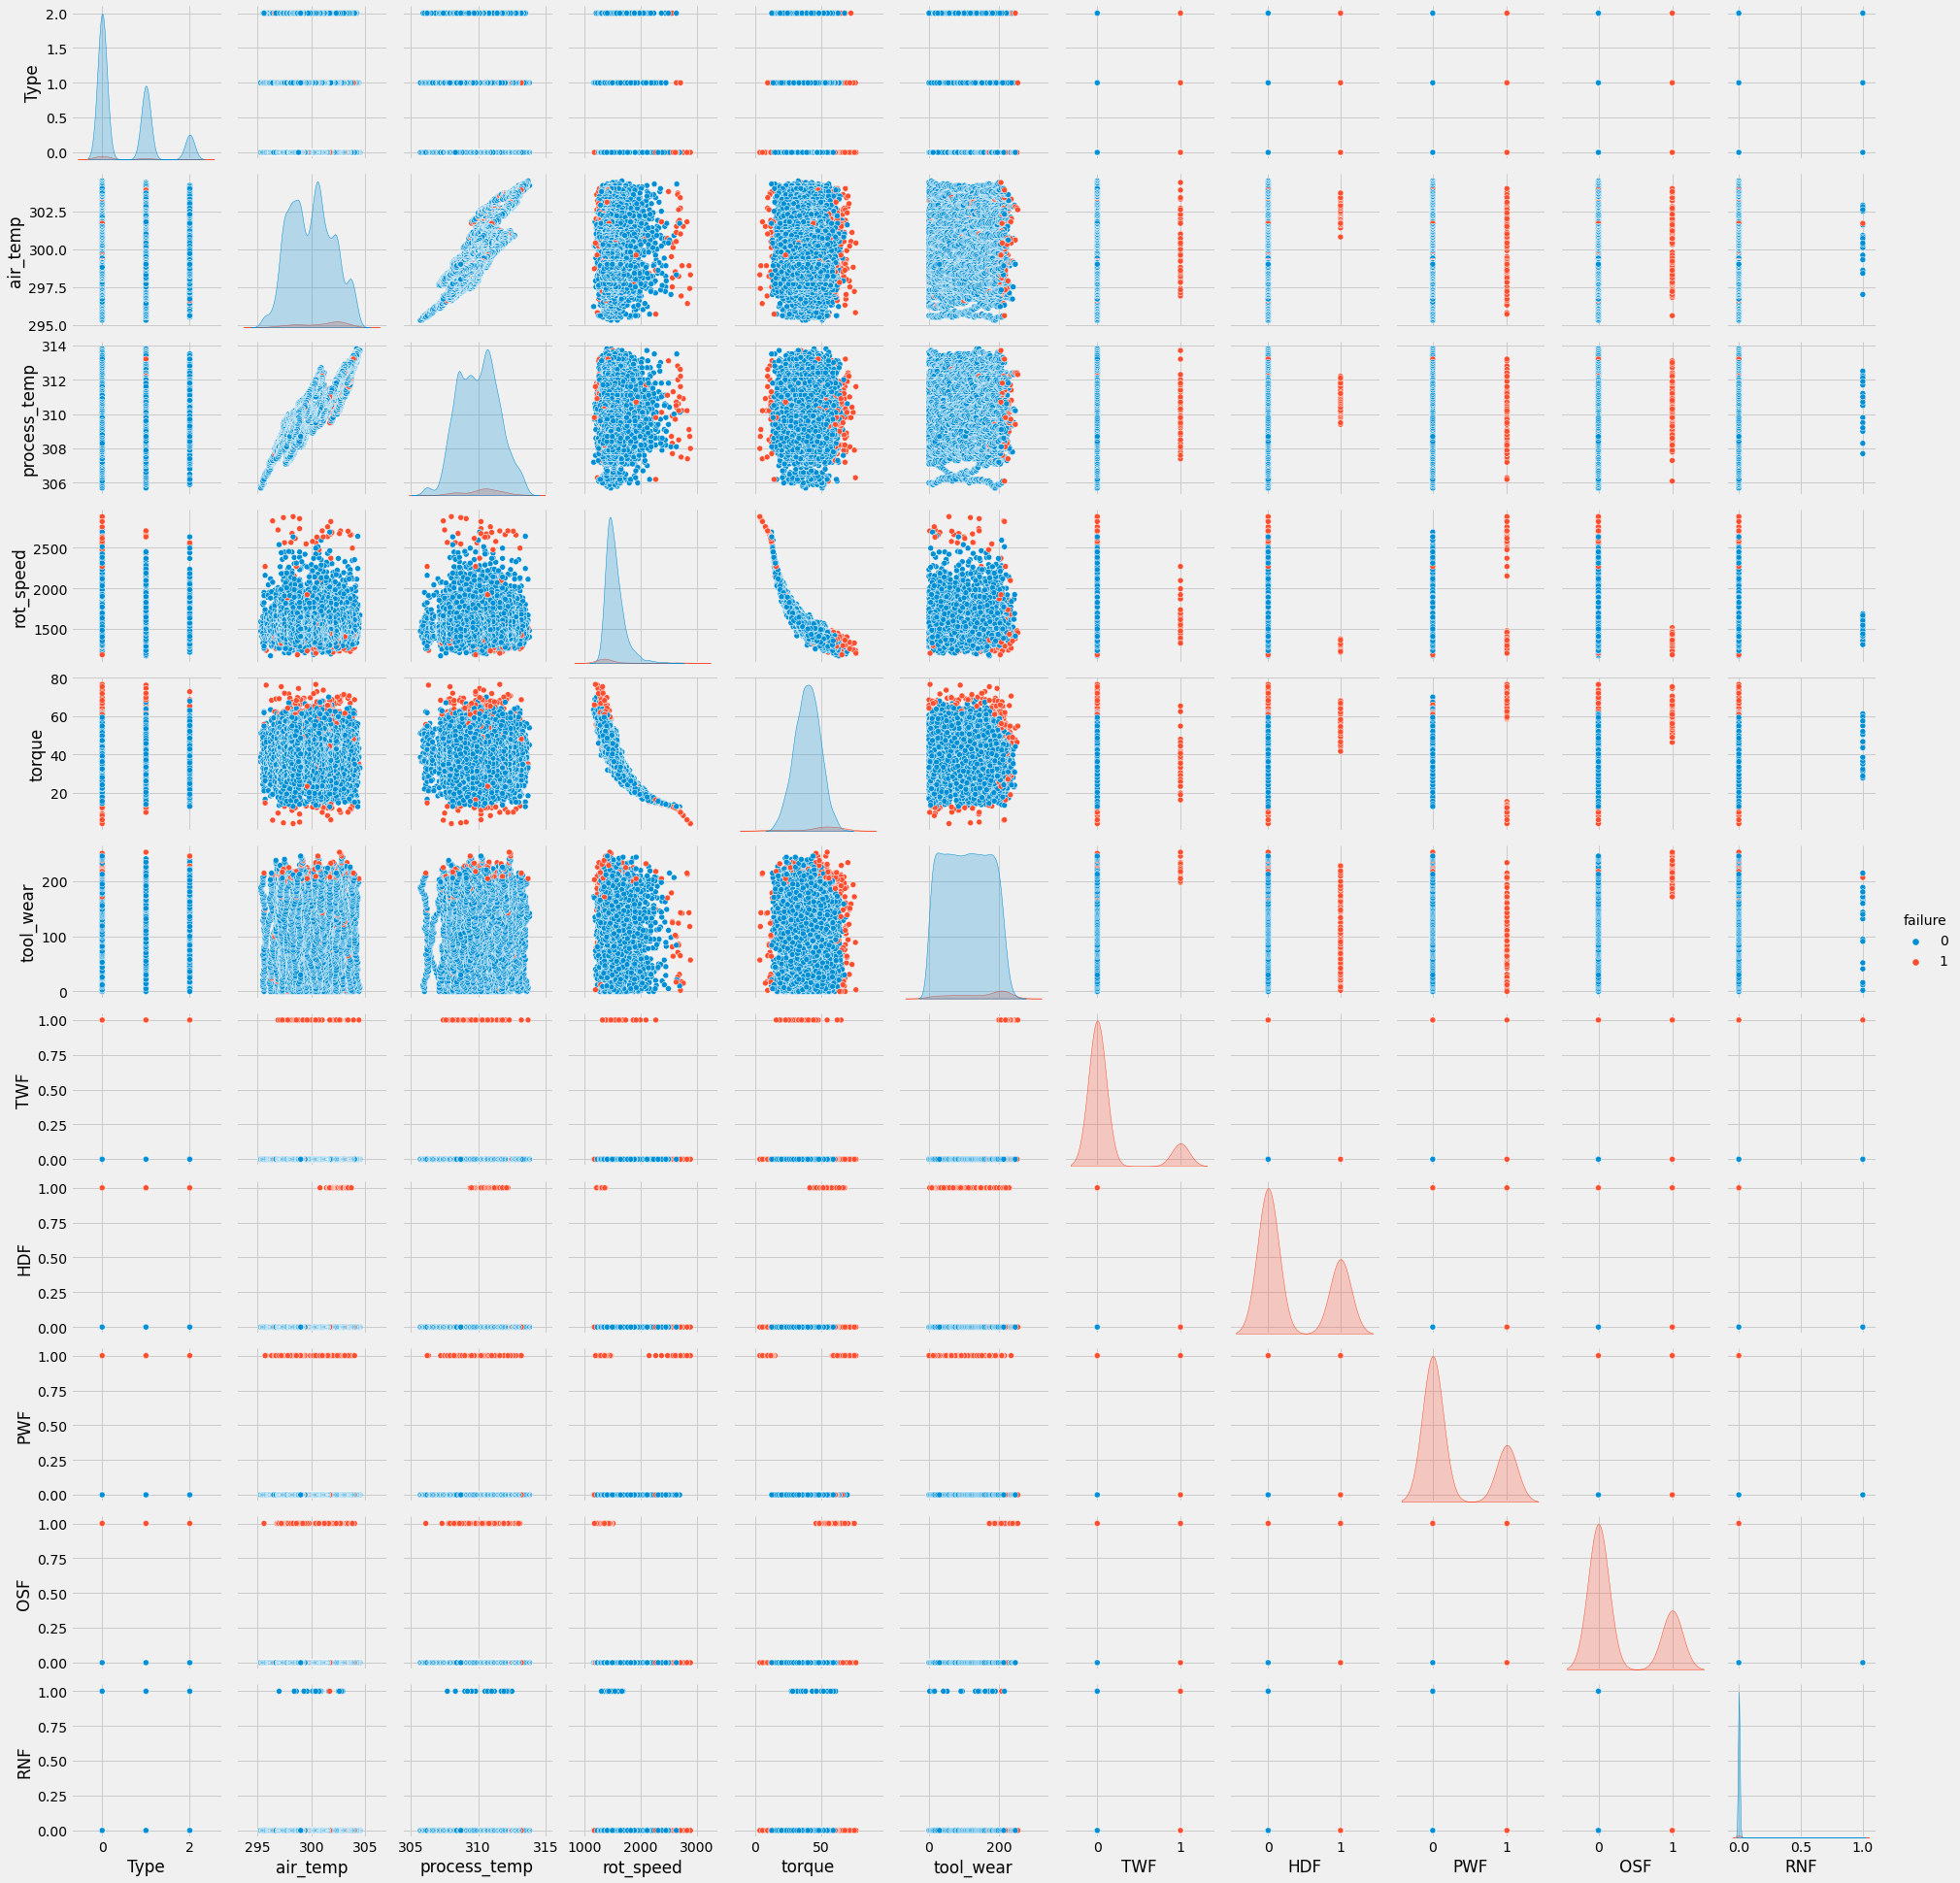

In [26]:
sns.pairplot(df, hue='failure')

<AxesSubplot:>

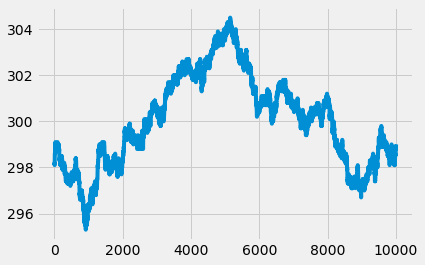

In [27]:
df['air_temp'].plot()

<AxesSubplot:>

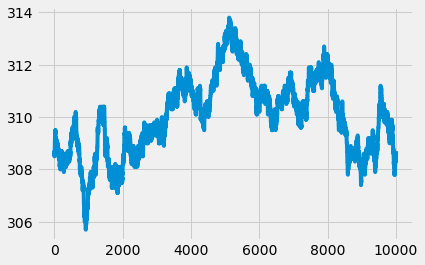

In [28]:
df['process_temp'].plot()

<AxesSubplot:>

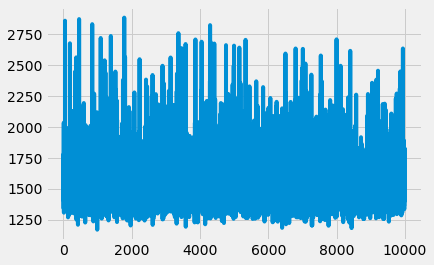

In [29]:
df['rot_speed'].plot()

<AxesSubplot:>

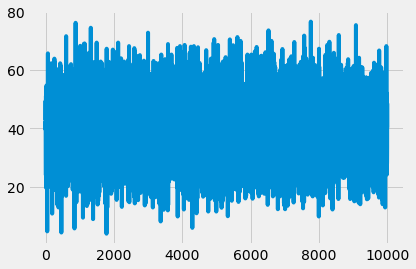

In [30]:
df['torque'].plot()

<AxesSubplot:>

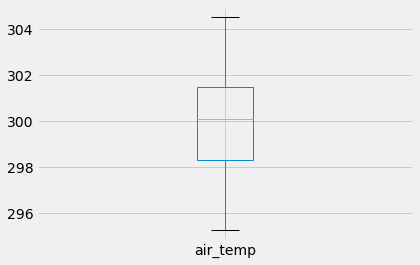

In [31]:
df.boxplot(column= ['air_temp'])

<AxesSubplot:>

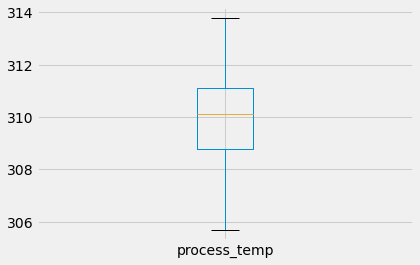

In [32]:
df.boxplot(column= ['process_temp'])


<AxesSubplot:>

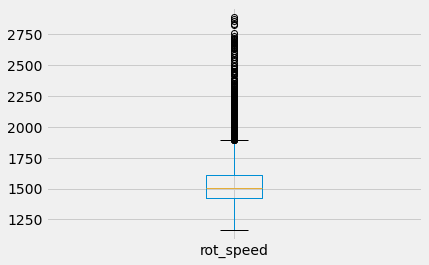

In [33]:
df.boxplot(column= ['rot_speed'])

<AxesSubplot:>

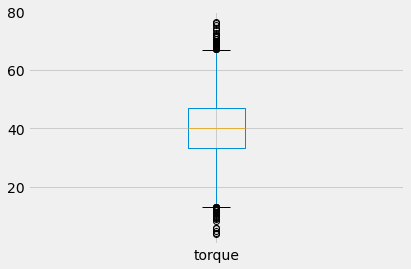

In [34]:
df.boxplot(column= ['torque'])

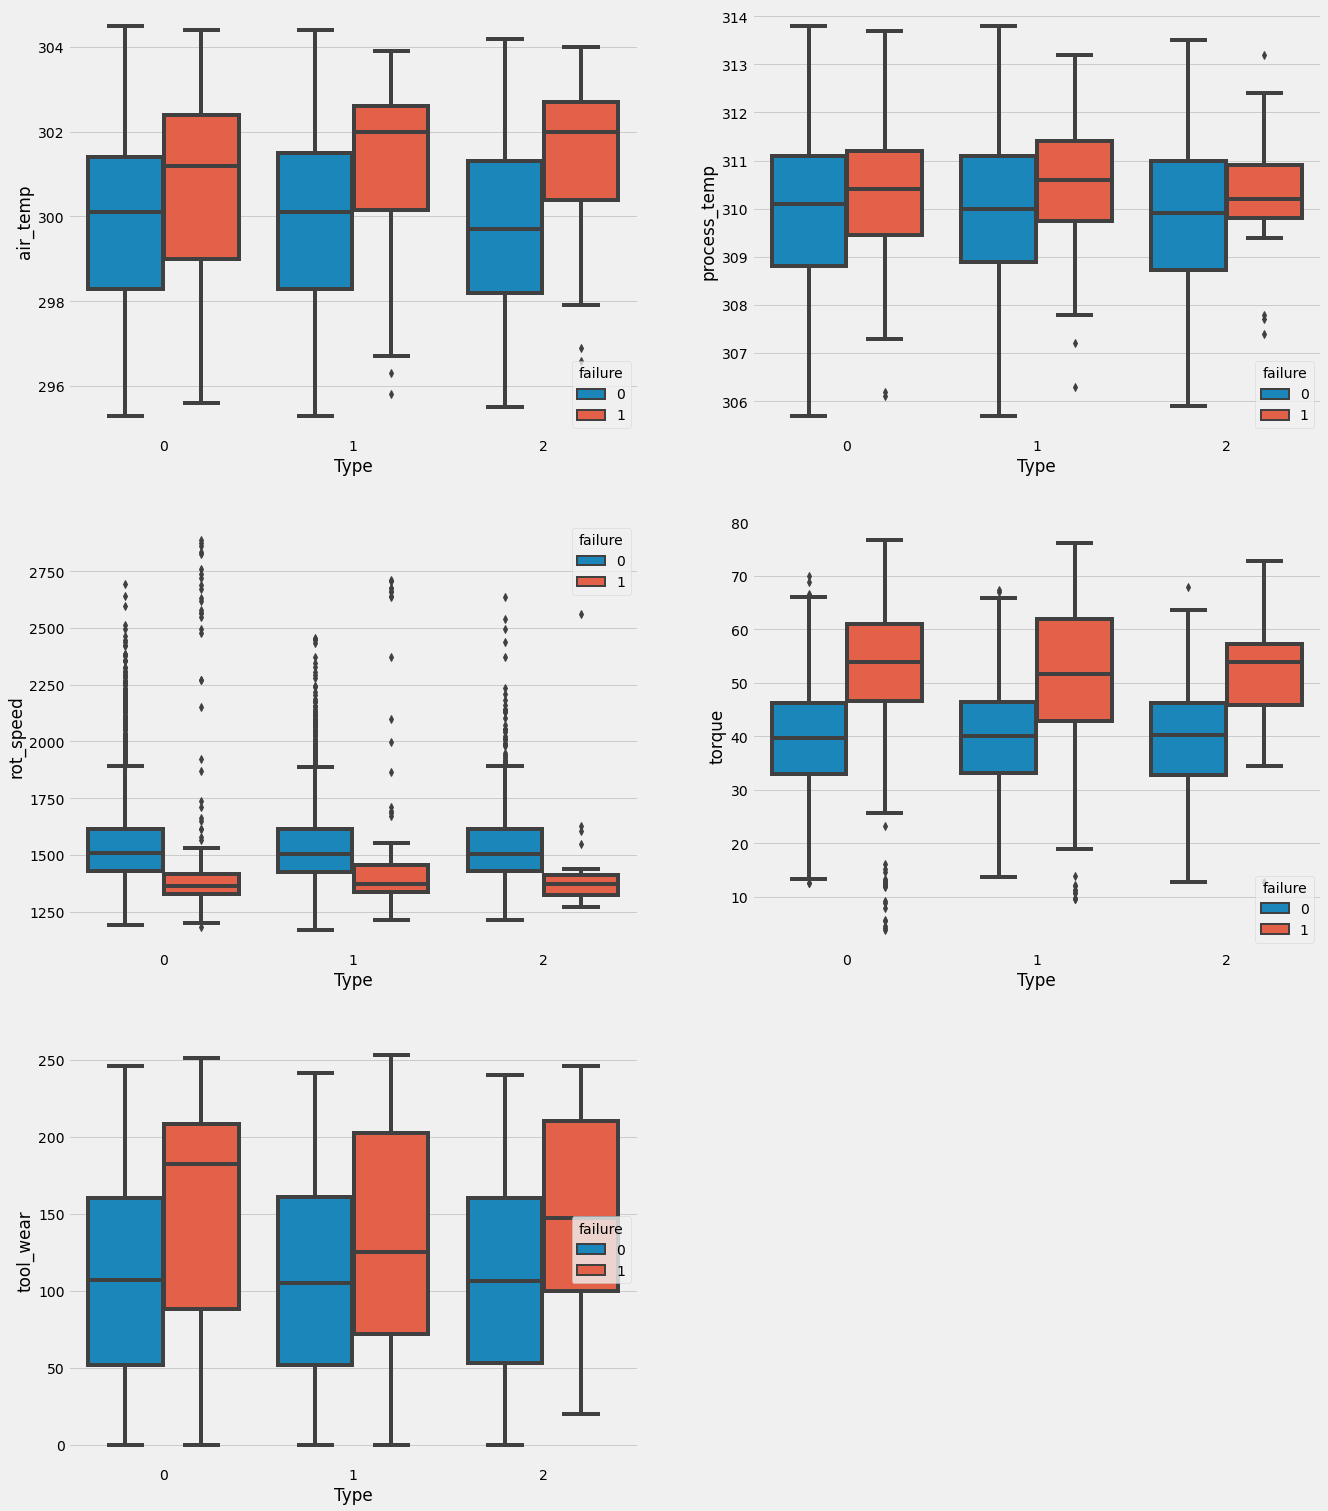

In [35]:
plt.figure(figsize = (20,25))
m=1
for i in ['air_temp', 'process_temp','rot_speed', 'torque', 'tool_wear'] :
    plt.subplot(3,2,m)
    sns.boxplot(data=df,y=i,x="Type",hue="failure")
    m+=1

# Splitting Dependent & Independent Features

In [36]:
X = df.drop(['failure'],axis=1)
y = df[['failure']]

In [37]:
X

,Type,air_temp,process_temp,rot_speed,torque,tool_wear,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,0,0,0,0
9996,2,298.9,308.4,1632,31.8,17,0,0,0,0,0
9997,1,299.0,308.6,1645,33.4,22,0,0,0,0,0
9998,2,299.0,308.7,1408,48.5,25,0,0,0,0,0


In [38]:
y

,failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


# Feature Selection

# 1) Filter methods Feature Selection

## Checking Correlation between Features 

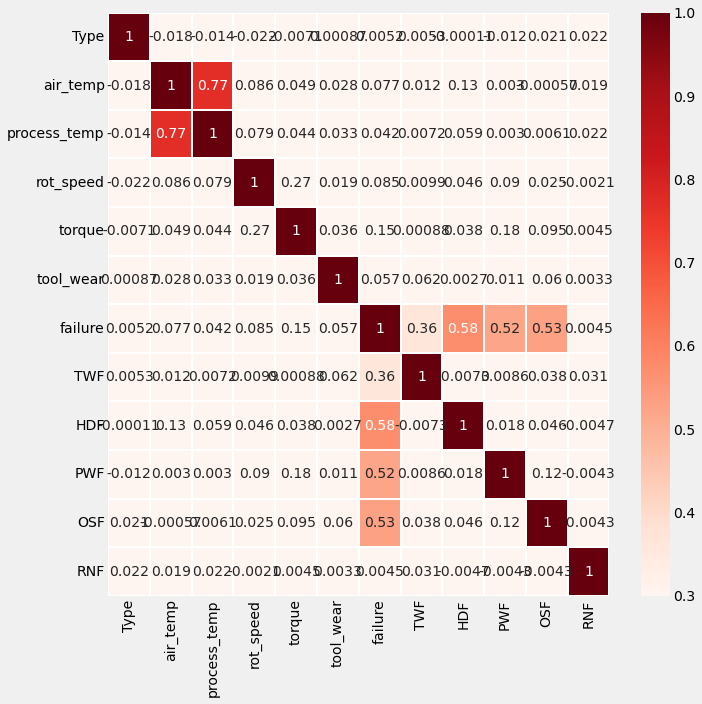

In [39]:
plt.figure(figsize = (10,10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True, linewidths=.2,cmap="Reds", vmin=0.3, vmax=1)
plt.show()

# Feature Selection Using Chi-square

In [40]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

        Specs        Score
5   tool_wear  4173.128871
7         HDF  3277.330383
9         OSF  2792.855457
8         PWF  2707.359882
6         TWF  1310.932153
4      torque   909.620844
3   rot_speed   407.816416
0        Type    12.140890
1    air_temp     0.908855
10        RNF     0.203554


# Filter methods

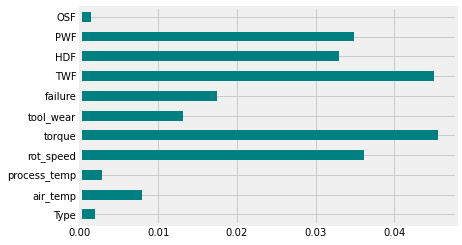

In [41]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, y) 
feat_importances = pd.Series (importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

# Variance Threshold


In [42]:
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X,y) #fit finds the features with zero variance
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# 2) Feature Importance using Extra Trees Classifier

In [43]:
# Feature Importance with Extra Trees Classifier


# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)



imp_feature = model.feature_importances_
print(imp_feature)


[1.45417878e-03 7.95984438e-03 6.68915327e-03 1.86628513e-02
 3.02341014e-02 1.18245521e-02 1.26942256e-01 3.19080749e-01
 2.27265700e-01 2.49825637e-01 6.09766810e-05]


# 3) Feature Extraction with RFE

In [44]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(max_iter=300)


rfe = RFE(model, n_features_to_select=8)
fit = rfe.fit(X, y)

fit.n_features_
fit.support_
fit.ranking_

array([1, 1, 1, 4, 2, 3, 1, 1, 1, 1, 1])

# 3) Mean Absolute Difference (MAD)


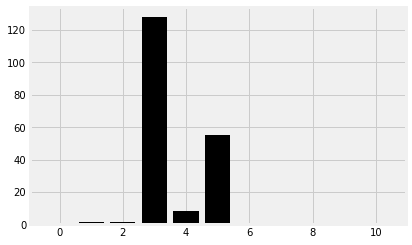

In [45]:
mean_abs_diff = np.sum(np.abs(X -np.mean(X, axis =0)), axis = 0)/X.shape[0]

#Plot the barchart

plt.bar(np.arange(X.shape[1]),mean_abs_diff, color = "black")
plt.show()

# 4) Wrapper Method Feature Selection

## Forward feature selection

In [46]:
!pip install mlxtend

In [47]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from sklearn.ensemble import RandomForestRegressor

model=sfs(RandomForestRegressor(),k_features=8,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.5s finished

[2022-03-31 10:47:39] Features: 1/8 -- score: 0.34304372678570744[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.6s finished

[2022-03-31 10:47:49] Features: 2/8 -- score: 0.633141579177967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    8.8s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    9.5s finished

[2022-03-31 10:47:58] Features: 3/8 -- score: 0.8056668190324178[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    8.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    8.9s finished

[2022-03-31 10:48:07] Features: 4/8 -- score: 0.971247

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=8,
                          n_jobs=-1, scoring='r2', verbose=2)

In [48]:
model.k_feature_idx_

(0, 1, 2, 6, 7, 8, 9, 10)

## Backward Feature Selection

In [49]:
colType = ['int64','float64']
numCols=list(df.select_dtypes(include=colType).columns)

In [50]:
a = df.drop(['failure'],axis=1).values
b = df[['failure']].values

In [51]:
data=df[numCols]

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor

backwardModel=sfs(RandomForestRegressor(),k_features=8,forward=False,verbose=2,cv=5,n_jobs=-1,scoring='r2')
 
backwardModel.fit(np.array(a),b)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.3s finished

[2022-03-31 10:49:15] Features: 10/8 -- score: 0.9607256217295002[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.6s finished

[2022-03-31 10:49:41] Features: 9/8 -- score: 0.9632293739755943[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   20.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   22.7s finished

[2022-03-31 10:50:04] Features: 8/8 -- score: 0.9629179861542522

SequentialFeatureSelector(estimator=RandomForestRegressor(), forward=False,
                          k_features=8, n_jobs=-1, scoring='r2', verbose=2)

In [53]:
backwardModel.k_feature_idx_

(1, 2, 3, 4, 6, 7, 8, 9)

In [54]:
df.columns[list(backwardModel.k_feature_idx_)]

Index(['air_temp', 'process_temp', 'rot_speed', 'torque', 'failure', 'TWF',
       'HDF', 'PWF'],
      dtype='object')

## Exhaustive Feature Selection

In [55]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs

emodel=efs(RandomForestRegressor(),min_features=1,max_features=5,scoring='r2',n_jobs=-1)

miniData=df[df.columns[list(backwardModel.k_feature_idx_)]]

emodel.fit(np.array(miniData),y)

Features: 218/218

ExhaustiveFeatureSelector(estimator=RandomForestRegressor(), max_features=5,
                          n_jobs=-1, scoring='r2')

In [56]:
emodel.best_idx_

(4,)

In [57]:
miniData.columns[list(emodel.best_idx_)]

Index(['failure'], dtype='object')

# 4) Embedded Methods for Feature Selection

## Ridge regression or L2 regularization

In [58]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

# using logistic regression with penalty l1.
selection = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
selection.fit(X, y)

# see the selected features.
selected_features = X.columns[(selection.get_support())]

# see the deleted features.
removed_features = X.columns[(selection.estimator_.coef_ == 0).ravel().tolist()]

# 5) Feature selection using Random Forest Classifier

<AxesSubplot:>

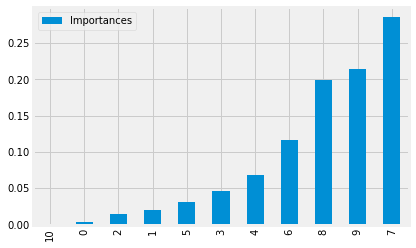

In [59]:
from sklearn.ensemble import RandomForestClassifier

# create the random forest with your hyperparameters.
model = RandomForestClassifier(n_estimators=340)

# fit the model to start training.
model.fit(X, y)

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": X.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
final_df.plot.bar() 




# Standarizing the Data using StandardScaler

In [60]:
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(X_scaled)

[[ 0.744 -0.952 -0.947 ... -0.098 -0.099 -0.044]
 [-0.745 -0.902 -0.88  ... -0.098 -0.099 -0.044]
 [-0.745 -0.952 -1.015 ... -0.098 -0.099 -0.044]
 ...
 [ 0.744 -0.502 -0.947 ... -0.098 -0.099 -0.044]
 [ 2.234 -0.502 -0.88  ... -0.098 -0.099 -0.044]
 [ 0.744 -0.502 -0.88  ... -0.098 -0.099 -0.044]]



# Splitting Data into Train & Test

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [62]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (6700, 11)
X_test (3300, 11)
y_train (6700, 1)
y_test (3300, 1)


# Model  building on Imbalance Data 


## Logistic Regression 

In [63]:
from sklearn.linear_model import LogisticRegression
lin_model = LogisticRegression(class_weight='balanced',C=2.0,l1_ratio=0)
lin_model.fit(X_train,y_train)

LogisticRegression(C=2.0, class_weight='balanced', l1_ratio=0)

In [64]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score,confusion_matrix,classification_report,f1_score



Train data

In [65]:
y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)

In [66]:
print('accuracy score:',accuracy_score(y_train,y_pred_train)*100)
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

accuracy score: 99.58208955223881
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6472
           1       0.91      0.98      0.94       228

    accuracy                           1.00      6700
   macro avg       0.95      0.99      0.97      6700
weighted avg       1.00      1.00      1.00      6700

confusion matrix:
 [[6449   23]
 [   5  223]]


In [67]:
list1 = [precision_score(y_train,y_pred_train),recall_score(y_train,y_pred_train),f1_score(y_train,y_pred_train),accuracy_score(y_train,y_pred_train)]
list1

[0.9065040650406504, 0.9780701754385965, 0.940928270042194, 0.9958208955223881]

In [68]:
reference = pd.DataFrame(
    index = ['precision_score','recall_score','f1_score','accuracy_score'],columns=['logistic'])
reference['logistic'] = list1
reference

,logistic
precision_score,0.906504
recall_score,0.978070
f1_score,0.940928
accuracy_score,0.995821



Test data

In [69]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

accuracy score: 0.9972727272727273
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3189
           1       0.96      0.96      0.96       111

    accuracy                           1.00      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       1.00      1.00      1.00      3300

confusion matrix:
 [[3184    5]
 [   4  107]]


## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(class_weight='balanced',max_depth=3,criterion='gini')
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [71]:
y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)



Train data

In [72]:
print('accuracy score:',accuracy_score(y_train,y_pred_train))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

accuracy score: 0.9958208955223881
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6472
           1       0.91      0.98      0.94       228

    accuracy                           1.00      6700
   macro avg       0.95      0.99      0.97      6700
weighted avg       1.00      1.00      1.00      6700

confusion matrix:
 [[6449   23]
 [   5  223]]


In [73]:
list2 = [precision_score(y_train,y_pred_train),recall_score(y_train,y_pred_train),f1_score(y_train,y_pred_train),accuracy_score(y_train,y_pred_train)]
list2

[0.9065040650406504, 0.9780701754385965, 0.940928270042194, 0.9958208955223881]

In [74]:
reference['decision_tree'] = list2
reference

,logistic,decision_tree
precision_score,0.906504,0.906504
recall_score,0.978070,0.978070
f1_score,0.940928,0.940928
accuracy_score,0.995821,0.995821



Test data

In [75]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

accuracy score: 0.9972727272727273
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3189
           1       0.96      0.96      0.96       111

    accuracy                           1.00      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       1.00      1.00      1.00      3300

confusion matrix:
 [[3184    5]
 [   4  107]]


In [76]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dt_classifier,param_grid={'criterion':['gini','entropy'],
                                            'max_depth':[2,3,4,5,6,7,8,9,10]},cv =3)
gs.fit(X_scaled,y)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [77]:
gs.best_params_


{'criterion': 'gini', 'max_depth': 4}

In [78]:
gs.best_score_


0.9753977797299825

## Random Forest Classifier


In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion='gini',n_estimators=80,class_weight='balanced')
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=80)

In [80]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf_classifier,param_grid={'n_estimators':[100,90,80],
                                            'criterion':['gini','entropy']},cv=5)
gs.fit(X_scaled,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=80),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 90, 80]})

In [81]:
gs.best_params_


{'criterion': 'gini', 'n_estimators': 80}

In [82]:
gs.best_score_


0.999

In [83]:
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)


Train Data


In [84]:
print('accuracy score:',accuracy_score(y_train,y_pred_train))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

accuracy score: 1.0
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6472
           1       1.00      1.00      1.00       228

    accuracy                           1.00      6700
   macro avg       1.00      1.00      1.00      6700
weighted avg       1.00      1.00      1.00      6700

confusion matrix:
 [[6472    0]
 [   0  228]]


In [85]:
list3 = [precision_score(y_train,y_pred_train),
         recall_score(y_train,y_pred_train),
         f1_score(y_train,y_pred_train),
         accuracy_score(y_train,y_pred_train)]
list3

[1.0, 1.0, 1.0, 1.0]

In [86]:
reference['random_forest'] = list3
reference

,logistic,decision_tree,random_forest
precision_score,0.906504,0.906504,1.0
recall_score,0.978070,0.978070,1.0
f1_score,0.940928,0.940928,1.0
accuracy_score,0.995821,0.995821,1.0


Test data

In [87]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

accuracy score: 0.9972727272727273
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3189
           1       1.00      0.92      0.96       111

    accuracy                           1.00      3300
   macro avg       1.00      0.96      0.98      3300
weighted avg       1.00      1.00      1.00      3300

confusion matrix:
 [[3189    0]
 [   9  102]]


## SVM

In [88]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear',C=1,gamma='auto',)
svc_model.fit(X_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [89]:
y_pred_train = svc_model.predict(X_train)
y_pred_test = svc_model.predict(X_test)

Train data

In [90]:
print('accuracy score:',accuracy_score(y_train,y_pred_train))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))

accuracy score: 0.9992537313432835
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6472
           1       1.00      0.98      0.99       228

    accuracy                           1.00      6700
   macro avg       1.00      0.99      0.99      6700
weighted avg       1.00      1.00      1.00      6700

confusion matrix:
 [[6472    0]
 [   5  223]]


In [91]:
list4 = [precision_score(y_train,y_pred_train),
         recall_score(y_train,y_pred_train),
         f1_score(y_train,y_pred_train),
         accuracy_score(y_train,y_pred_train)]
list4

[1.0, 0.9780701754385965, 0.9889135254988913, 0.9992537313432835]

In [92]:
reference['SVM'] = list4
reference

,logistic,decision_tree,random_forest,SVM
precision_score,0.906504,0.906504,1.0,1.000000
recall_score,0.978070,0.978070,1.0,0.978070
f1_score,0.940928,0.940928,1.0,0.988914
accuracy_score,0.995821,0.995821,1.0,0.999254


Test data

In [93]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))

accuracy score: 0.9987878787878788
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3189
           1       1.00      0.96      0.98       111

    accuracy                           1.00      3300
   macro avg       1.00      0.98      0.99      3300
weighted avg       1.00      1.00      1.00      3300

confusion matrix:
 [[3189    0]
 [   4  107]]


In [94]:
list4 = [precision_score(y_train,y_pred_train),recall_score(y_train,y_pred_train),f1_score(y_train,y_pred_train),accuracy_score(y_train,y_pred_train)]
list4

[1.0, 0.9780701754385965, 0.9889135254988913, 0.9992537313432835]

In [95]:
reference['SVM'] = list4
reference

,logistic,decision_tree,random_forest,SVM
precision_score,0.906504,0.906504,1.0,1.000000
recall_score,0.978070,0.978070,1.0,0.978070
f1_score,0.940928,0.940928,1.0,0.988914
accuracy_score,0.995821,0.995821,1.0,0.999254


## Boosting Technique


In [96]:
!pip install lightgbm


In [97]:
!pip install xgboost

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [99]:
gb_classifier = GradientBoostingClassifier()
adb_classifier = AdaBoostClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()

In [100]:
gb_classifier.fit(X_train,y_train)
adb_classifier.fit(X_train,y_train)
xgb_classifier.fit(X_train,y_train)
lgbm_classifier.fit(X_train,y_train)

[10:55:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LGBMClassifier()

## Adaboost Performance


In [101]:
y_pred_adb = adb_classifier.predict(X_test)


In [102]:
print(accuracy_score(y_test,y_pred_adb))
print(classification_report(y_test,y_pred_adb))
print(confusion_matrix(y_test,y_pred_adb))

0.9987878787878788
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3189
           1       1.00      0.96      0.98       111

    accuracy                           1.00      3300
   macro avg       1.00      0.98      0.99      3300
weighted avg       1.00      1.00      1.00      3300

[[3189    0]
 [   4  107]]


In [103]:
list5 = [precision_score(y_train,y_pred_train),
         recall_score(y_train,y_pred_train),
         f1_score(y_train,y_pred_train),
         accuracy_score(y_train,y_pred_train)]
list5

[1.0, 0.9780701754385965, 0.9889135254988913, 0.9992537313432835]

In [104]:
reference['Adaboost'] = list5
reference

,logistic,decision_tree,random_forest,SVM,Adaboost
precision_score,0.906504,0.906504,1.0,1.000000,1.000000
recall_score,0.978070,0.978070,1.0,0.978070,0.978070
f1_score,0.940928,0.940928,1.0,0.988914,0.988914
accuracy_score,0.995821,0.995821,1.0,0.999254,0.999254


## Gradient Performance


In [105]:
y_pred_gb = gb_classifier.predict(X_test)


In [106]:
print(accuracy_score(y_test,y_pred_gb))
print(classification_report(y_test,y_pred_gb))
print(confusion_matrix(y_test,y_pred_gb))

0.9981818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3189
           1       0.98      0.96      0.97       111

    accuracy                           1.00      3300
   macro avg       0.99      0.98      0.99      3300
weighted avg       1.00      1.00      1.00      3300

[[3187    2]
 [   4  107]]


In [107]:
list6 = [precision_score(y_train,y_pred_train),
         recall_score(y_train,y_pred_train),
         f1_score(y_train,y_pred_train),
         accuracy_score(y_train,y_pred_train)]
list6

[1.0, 0.9780701754385965, 0.9889135254988913, 0.9992537313432835]

In [108]:
reference['Gradient Boost'] = list6
reference

,logistic,decision_tree,random_forest,SVM,Adaboost,Gradient Boost
precision_score,0.906504,0.906504,1.0,1.000000,1.000000,1.000000
recall_score,0.978070,0.978070,1.0,0.978070,0.978070,0.978070
f1_score,0.940928,0.940928,1.0,0.988914,0.988914,0.988914
accuracy_score,0.995821,0.995821,1.0,0.999254,0.999254,0.999254


## Extreme Gradient Boost Performance


In [109]:
y_pred_xgb = xgb_classifier.predict(X_test)


In [110]:
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

0.9987878787878788
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3189
           1       1.00      0.96      0.98       111

    accuracy                           1.00      3300
   macro avg       1.00      0.98      0.99      3300
weighted avg       1.00      1.00      1.00      3300

[[3189    0]
 [   4  107]]


In [111]:
list7 = [precision_score(y_train,y_pred_train),
         recall_score(y_train,y_pred_train),
         f1_score(y_train,y_pred_train),
         accuracy_score(y_train,y_pred_train)]
list7

[1.0, 0.9780701754385965, 0.9889135254988913, 0.9992537313432835]

In [112]:
reference['XG Boost'] = list7
reference


,logistic,decision_tree,random_forest,SVM,Adaboost,Gradient Boost,XG Boost
precision_score,0.906504,0.906504,1.0,1.000000,1.000000,1.000000,1.000000
recall_score,0.978070,0.978070,1.0,0.978070,0.978070,0.978070,0.978070
f1_score,0.940928,0.940928,1.0,0.988914,0.988914,0.988914,0.988914
accuracy_score,0.995821,0.995821,1.0,0.999254,0.999254,0.999254,0.999254


## LGBM Performance


In [113]:
y_pred_lgbm= lgbm_classifier.predict(X_test)


In [114]:
print(accuracy_score(y_test,y_pred_lgbm))
print(classification_report(y_test,y_pred_lgbm))
print(confusion_matrix(y_test,y_pred_lgbm))

0.9987878787878788
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3189
           1       1.00      0.96      0.98       111

    accuracy                           1.00      3300
   macro avg       1.00      0.98      0.99      3300
weighted avg       1.00      1.00      1.00      3300

[[3189    0]
 [   4  107]]


In [115]:
list8 = [precision_score(y_train,y_pred_train),
         recall_score(y_train,y_pred_train),
         f1_score(y_train,y_pred_train),
         accuracy_score(y_train,y_pred_train)]
list8

[1.0, 0.9780701754385965, 0.9889135254988913, 0.9992537313432835]

In [116]:
reference['LGBM'] = list8
reference

,logistic,decision_tree,random_forest,SVM,Adaboost,Gradient Boost,XG Boost,LGBM
precision_score,0.906504,0.906504,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
recall_score,0.978070,0.978070,1.0,0.978070,0.978070,0.978070,0.978070,0.978070
f1_score,0.940928,0.940928,1.0,0.988914,0.988914,0.988914,0.988914,0.988914
accuracy_score,0.995821,0.995821,1.0,0.999254,0.999254,0.999254,0.999254,0.999254


## KNN
### Grid Search for Algorithm Tuning

In [117]:
# Grid Search for Algorithm Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [118]:
n_neighbors = np.array(range(1,100))
param_grid = dict(n_neighbors=n_neighbors)

In [119]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [120]:
print(grid.best_score_)
print(grid.best_params_)

0.9702985074626864
{'n_neighbors': 5}


## Voting Classifier  ( Imbalanced )


LR: 0.999254 (0.001001)
[10:58:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:58:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:58:05] WARNING: C:/Users/Administrator/wor

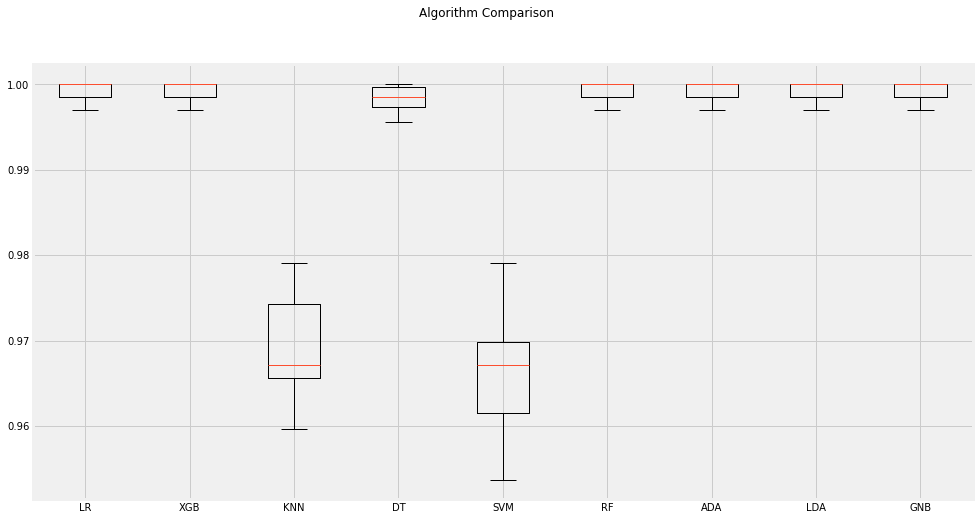

In [121]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=200)))
models.append(('ADA', AdaBoostClassifier(n_estimators=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]              
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Balancing the Data using SMOTETomek

In [122]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss


In [123]:
smk = SMOTETomek(random_state=20)
bal_X, bal_y = smk.fit_resample(X, y)

In [124]:
bal_X.shape

(19190, 11)

In [125]:
bal_y.shape

(19190, 1)

# Splitting the Balanced data in Train And Test

In [126]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(bal_X,bal_y,train_size=.8,random_state=40)

In [127]:
print("X_train1", X_train1.shape)
print("X_test1", X_test1.shape)
print("y_train1", y_train1.shape)
print("y_test1", y_test1.shape)

X_train1 (15352, 11)
X_test1 (3838, 11)
y_train1 (15352, 1)
y_test1 (3838, 1)


# Model building on Balance data

## Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
lin_model1 = LogisticRegression(class_weight='balanced',C=2.0,l1_ratio=0)
lin_model1.fit(X_train1,y_train1)

LogisticRegression(C=2.0, class_weight='balanced', l1_ratio=0)

In [129]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,r2_score,confusion_matrix,classification_report,f1_score

Train data

In [130]:
y_pred_train1 = lin_model1.predict(X_train1)
y_pred_test1 = lin_model1.predict(X_test1)

In [131]:
print('accuracy score:',accuracy_score(y_train1,y_pred_train1)*100)
print('classification_report:\n',classification_report(y_train1,y_pred_train1))
print('confusion matrix:\n',confusion_matrix(y_train1,y_pred_train1))

accuracy score: 91.1412193850964
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7680
           1       0.91      0.91      0.91      7672

    accuracy                           0.91     15352
   macro avg       0.91      0.91      0.91     15352
weighted avg       0.91      0.91      0.91     15352

confusion matrix:
 [[7008  672]
 [ 688 6984]]


In [132]:
list11 = [precision_score(y_train1,y_pred_train1),recall_score(y_train1,y_pred_train1),f1_score(y_train1,y_pred_train1),accuracy_score(y_train1,y_pred_train1)]
list11

[0.9122257053291536,
 0.9103232533889468,
 0.9112734864300627,
 0.9114121938509641]

In [133]:
reference1 = pd.DataFrame(
    index = ['precision_score','recall_score','f1_score','accuracy_score'],columns=['logistic'])
reference1['logistic'] = list11
reference1

,logistic
precision_score,0.912226
recall_score,0.910323
f1_score,0.911273
accuracy_score,0.911412


Test Data

In [134]:
print('accuracy score:',accuracy_score(y_test1,y_pred_test1))
print('classification_report:\n',classification_report(y_test1,y_pred_test1))
print('confusion matrix:\n',confusion_matrix(y_test1,y_pred_test1))

accuracy score: 0.9051589369463262
classification_report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1915
           1       0.91      0.90      0.90      1923

    accuracy                           0.91      3838
   macro avg       0.91      0.91      0.91      3838
weighted avg       0.91      0.91      0.91      3838

confusion matrix:
 [[1742  173]
 [ 191 1732]]


In [135]:
reference1 = pd.DataFrame(
    index = ['precision_score','recall_score','f1_score','accuracy_score'],columns=['logistic'])
reference1['logistic'] = list11
reference1

,logistic
precision_score,0.912226
recall_score,0.910323
f1_score,0.911273
accuracy_score,0.911412


## SVM

In [136]:
from sklearn.svm import SVC
svc_model1 = SVC(kernel='rbf',C=1,gamma='auto',)
svc_model1.fit(X_train1,y_train1)

SVC(C=1, gamma='auto')

In [137]:
y_pred_train1 = svc_model1.predict(X_train1)
y_pred_test1 = svc_model1.predict(X_test1)

Train data

In [138]:
print('accuracy score:',accuracy_score(y_train1,y_pred_train1))
print('classification_report:\n',classification_report(y_train1,y_pred_train1))
print('confusion matrix:\n',confusion_matrix(y_train1,y_pred_train1))

accuracy score: 0.9985018238665971
classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7680
           1       1.00      1.00      1.00      7672

    accuracy                           1.00     15352
   macro avg       1.00      1.00      1.00     15352
weighted avg       1.00      1.00      1.00     15352

confusion matrix:
 [[7660   20]
 [   3 7669]]


In [139]:
list22 = [precision_score(y_train1,y_pred_train1),
         recall_score(y_train1,y_pred_train1),
         f1_score(y_train1,y_pred_train1),
         accuracy_score(y_train1,y_pred_train1)]
list22

[0.9973988815190532,
 0.9996089676746611,
 0.9985027016470281,
 0.9985018238665971]

In [140]:
reference1['SVM'] = list22
reference1

,logistic,SVM
precision_score,0.912226,0.997399
recall_score,0.910323,0.999609
f1_score,0.911273,0.998503
accuracy_score,0.911412,0.998502


Test data

In [141]:
print('accuracy score:',accuracy_score(y_test1,y_pred_test1))
print('classification_report:\n',classification_report(y_test1,y_pred_test1))
print('confusion matrix:\n',confusion_matrix(y_test1,y_pred_test1))

accuracy score: 0.9580510682647212
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1915
           1       0.98      0.93      0.96      1923

    accuracy                           0.96      3838
   macro avg       0.96      0.96      0.96      3838
weighted avg       0.96      0.96      0.96      3838

confusion matrix:
 [[1881   34]
 [ 127 1796]]


In [142]:
list22 = [precision_score(y_train,y_pred_train),recall_score(y_train,y_pred_train),f1_score(y_train,y_pred_train),accuracy_score(y_train,y_pred_train)]
list22

[1.0, 0.9780701754385965, 0.9889135254988913, 0.9992537313432835]

In [143]:
reference1['SVM'] = list22
reference1

,logistic,SVM
precision_score,0.912226,1.000000
recall_score,0.910323,0.978070
f1_score,0.911273,0.988914
accuracy_score,0.911412,0.999254


## Decision Tree

In [144]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier1 = DecisionTreeClassifier(class_weight='balanced',max_depth=3,criterion='gini')
dt_classifier1.fit(X_train1,y_train1)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [145]:
y_pred_train1 = lin_model1.predict(X_train1)
y_pred_test1 = lin_model1.predict(X_test1)

Train data

In [146]:
print('accuracy score:',accuracy_score(y_train1,y_pred_train1))
print('classification_report:\n',classification_report(y_train1,y_pred_train1))
print('confusion matrix:\n',confusion_matrix(y_train1,y_pred_train1))

accuracy score: 0.9114121938509641
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7680
           1       0.91      0.91      0.91      7672

    accuracy                           0.91     15352
   macro avg       0.91      0.91      0.91     15352
weighted avg       0.91      0.91      0.91     15352

confusion matrix:
 [[7008  672]
 [ 688 6984]]


In [147]:
list33 = [precision_score(y_train1,y_pred_train1),recall_score(y_train1,y_pred_train1),f1_score(y_train1,y_pred_train1),accuracy_score(y_train1,y_pred_train1)]
list33

[0.9122257053291536,
 0.9103232533889468,
 0.9112734864300627,
 0.9114121938509641]

In [148]:
reference1['decision_tree'] = list33
reference1

,logistic,SVM,decision_tree
precision_score,0.912226,1.000000,0.912226
recall_score,0.910323,0.978070,0.910323
f1_score,0.911273,0.988914,0.911273
accuracy_score,0.911412,0.999254,0.911412


Test data

In [149]:
print('accuracy score:',accuracy_score(y_test1,y_pred_test1))
print('classification_report:\n',classification_report(y_test1,y_pred_test1))
print('confusion matrix:\n',confusion_matrix(y_test1,y_pred_test1))

accuracy score: 0.9051589369463262
classification_report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1915
           1       0.91      0.90      0.90      1923

    accuracy                           0.91      3838
   macro avg       0.91      0.91      0.91      3838
weighted avg       0.91      0.91      0.91      3838

confusion matrix:
 [[1742  173]
 [ 191 1732]]


In [150]:
from sklearn.model_selection import GridSearchCV
gs1 = GridSearchCV(dt_classifier,param_grid={'criterion':['gini','entropy'],
                                            'max_depth':[2,3,4,5,6,7,8,9,10]},cv =3)
gs1.fit(X_scaled,y)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [151]:
gs1.best_params_


{'criterion': 'gini', 'max_depth': 4}

In [152]:
gs1.best_score_


0.9753977797299825

## Random Forest Classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier1 = RandomForestClassifier(criterion='gini',n_estimators=80,class_weight='balanced')
rf_classifier1.fit(X_train1,y_train1)

RandomForestClassifier(class_weight='balanced', n_estimators=80)

In [154]:
from sklearn.model_selection import GridSearchCV
gs1 = GridSearchCV(rf_classifier,param_grid={'n_estimators':[100,90,80],
                                            'criterion':['gini','entropy']},cv=5)
gs1.fit(X_scaled,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=80),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 90, 80]})

In [155]:
gs1.best_params_


{'criterion': 'entropy', 'n_estimators': 90}

In [156]:
gs1.best_score_


0.9991

In [157]:
y_pred_train1 = rf_classifier.predict(X_train1)
y_pred_test1 = rf_classifier.predict(X_test1)

Train Data

In [158]:
print('accuracy score:',accuracy_score(y_train1,y_pred_train1))
print('classification_report:\n',classification_report(y_train1,y_pred_train1))
print('confusion matrix:\n',confusion_matrix(y_train1,y_pred_train1))

accuracy score: 0.8740229286086504
classification_report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      7680
           1       1.00      0.75      0.86      7672

    accuracy                           0.87     15352
   macro avg       0.90      0.87      0.87     15352
weighted avg       0.90      0.87      0.87     15352

confusion matrix:
 [[7680    0]
 [1934 5738]]


In [159]:
list44 = [precision_score(y_train1,y_pred_train1),
         recall_score(y_train1,y_pred_train1),
         f1_score(y_train1,y_pred_train1),
         accuracy_score(y_train1,y_pred_train1)]
list44

[1.0, 0.7479144942648592, 0.855779269202088, 0.8740229286086504]

In [160]:
reference1['random_forest'] = list44
reference1

,logistic,SVM,decision_tree,random_forest
precision_score,0.912226,1.000000,0.912226,1.000000
recall_score,0.910323,0.978070,0.910323,0.747914
f1_score,0.911273,0.988914,0.911273,0.855779
accuracy_score,0.911412,0.999254,0.911412,0.874023


Test data

In [161]:
print('accuracy score:',accuracy_score(y_test1,y_pred_test1))
print('classification_report:\n',classification_report(y_test1,y_pred_test1))
print('confusion matrix:\n',confusion_matrix(y_test1,y_pred_test1))

accuracy score: 0.8731109953100573
classification_report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1915
           1       1.00      0.75      0.86      1923

    accuracy                           0.87      3838
   macro avg       0.90      0.87      0.87      3838
weighted avg       0.90      0.87      0.87      3838

confusion matrix:
 [[1915    0]
 [ 487 1436]]


## Boosting Technique

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [163]:
gb_classifier1 = GradientBoostingClassifier()
adb_classifier1 = AdaBoostClassifier()
xgb_classifier1 = XGBClassifier()
lgbm_classifier1 = LGBMClassifier()

In [164]:
gb_classifier1.fit(X_train1,y_train1)
adb_classifier1.fit(X_train1,y_train1)
xgb_classifier1.fit(X_train1,y_train1)
lgbm_classifier1.fit(X_train1,y_train1)

[11:02:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LGBMClassifier()

## Adaboost Performance

In [165]:
y_pred_adb1 = adb_classifier.predict(X_test1)


In [166]:
print(accuracy_score(y_test1,y_pred_adb1))
print(classification_report(y_test1,y_pred_adb1))
print(confusion_matrix(y_test1,y_pred_adb1))

0.8746743095362168
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1915
           1       1.00      0.75      0.86      1923

    accuracy                           0.87      3838
   macro avg       0.90      0.87      0.87      3838
weighted avg       0.90      0.87      0.87      3838

[[1915    0]
 [ 481 1442]]


In [167]:
list55 = [precision_score(y_train1,y_pred_train1),
         recall_score(y_train1,y_pred_train1),
         f1_score(y_train1,y_pred_train1),
         accuracy_score(y_train1,y_pred_train1)]
list55

[1.0, 0.7479144942648592, 0.855779269202088, 0.8740229286086504]

In [168]:
reference1['Adaboost'] = list55
reference1

,logistic,SVM,decision_tree,random_forest,Adaboost
precision_score,0.912226,1.000000,0.912226,1.000000,1.000000
recall_score,0.910323,0.978070,0.910323,0.747914,0.747914
f1_score,0.911273,0.988914,0.911273,0.855779,0.855779
accuracy_score,0.911412,0.999254,0.911412,0.874023,0.874023


## Gradient Performance

In [169]:
y_pred_gb1 = gb_classifier.predict(X_test1)


In [170]:
print(accuracy_score(y_test1,y_pred_gb1))
print(classification_report(y_test1,y_pred_gb1))
print(confusion_matrix(y_test1,y_pred_gb1))

0.8741532047941636
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1915
           1       1.00      0.75      0.86      1923

    accuracy                           0.87      3838
   macro avg       0.90      0.87      0.87      3838
weighted avg       0.90      0.87      0.87      3838

[[1914    1]
 [ 482 1441]]


In [171]:
list66 = [precision_score(y_train1,y_pred_train1),
         recall_score(y_train1,y_pred_train1),
         f1_score(y_train1,y_pred_train1),
         accuracy_score(y_train1,y_pred_train1)]
list66

[1.0, 0.7479144942648592, 0.855779269202088, 0.8740229286086504]

In [172]:
reference1['Gradient Boost'] = list66
reference1

,logistic,SVM,decision_tree,random_forest,Adaboost,Gradient Boost
precision_score,0.912226,1.000000,0.912226,1.000000,1.000000,1.000000
recall_score,0.910323,0.978070,0.910323,0.747914,0.747914,0.747914
f1_score,0.911273,0.988914,0.911273,0.855779,0.855779,0.855779
accuracy_score,0.911412,0.999254,0.911412,0.874023,0.874023,0.874023


## Extreme Gradient Boost Performance¶

In [173]:
y_pred_xgb1 = xgb_classifier.predict(X_test1)


In [174]:
print(accuracy_score(y_test1,y_pred_xgb1))
print(classification_report(y_test1,y_pred_xgb1))
print(confusion_matrix(y_test1,y_pred_xgb1))

0.8749348619072433
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1915
           1       1.00      0.75      0.86      1923

    accuracy                           0.87      3838
   macro avg       0.90      0.88      0.87      3838
weighted avg       0.90      0.87      0.87      3838

[[1915    0]
 [ 480 1443]]


In [175]:
list77 = [precision_score(y_train1,y_pred_train1),
         recall_score(y_train1,y_pred_train1),
         f1_score(y_train1,y_pred_train1),
         accuracy_score(y_train1,y_pred_train1)]
list77

[1.0, 0.7479144942648592, 0.855779269202088, 0.8740229286086504]

In [176]:
reference1['XG Boost'] = list77
reference1


,logistic,SVM,decision_tree,random_forest,Adaboost,Gradient Boost,XG Boost
precision_score,0.912226,1.000000,0.912226,1.000000,1.000000,1.000000,1.000000
recall_score,0.910323,0.978070,0.910323,0.747914,0.747914,0.747914,0.747914
f1_score,0.911273,0.988914,0.911273,0.855779,0.855779,0.855779,0.855779
accuracy_score,0.911412,0.999254,0.911412,0.874023,0.874023,0.874023,0.874023


## LGBM Performance

In [177]:
y_pred_lgbm1= lgbm_classifier.predict(X_test1)


In [178]:
list88 = [precision_score(y_train1,y_pred_train1),
         recall_score(y_train1,y_pred_train1),
         f1_score(y_train1,y_pred_train1),
         accuracy_score(y_train1,y_pred_train1)]
list88

[1.0, 0.7479144942648592, 0.855779269202088, 0.8740229286086504]

In [179]:
reference1['LGBM'] = list88
reference1

,logistic,SVM,decision_tree,random_forest,Adaboost,Gradient Boost,XG Boost,LGBM
precision_score,0.912226,1.000000,0.912226,1.000000,1.000000,1.000000,1.000000,1.000000
recall_score,0.910323,0.978070,0.910323,0.747914,0.747914,0.747914,0.747914,0.747914
f1_score,0.911273,0.988914,0.911273,0.855779,0.855779,0.855779,0.855779,0.855779
accuracy_score,0.911412,0.999254,0.911412,0.874023,0.874023,0.874023,0.874023,0.874023


## KNN
### Grid Search for Algorithm Tuning

In [180]:
# Grid Search for Algorithm Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [181]:
n_neighbors = np.array(range(1,100))
param_grid = dict(n_neighbors=n_neighbors)

In [182]:
model1 = KNeighborsClassifier()
grid1 = GridSearchCV(estimator=model1, param_grid=param_grid)
grid1.fit(X_train1,y_train1)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [183]:
print(grid1.best_score_)
print(grid1.best_params_)

0.9562927332182856
{'n_neighbors': 1}


# Voting Classifier ( Balanced )

LR: 0.929585 (0.006438)
[11:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:05:30] WARNING: C:/Users/Administrator/wor

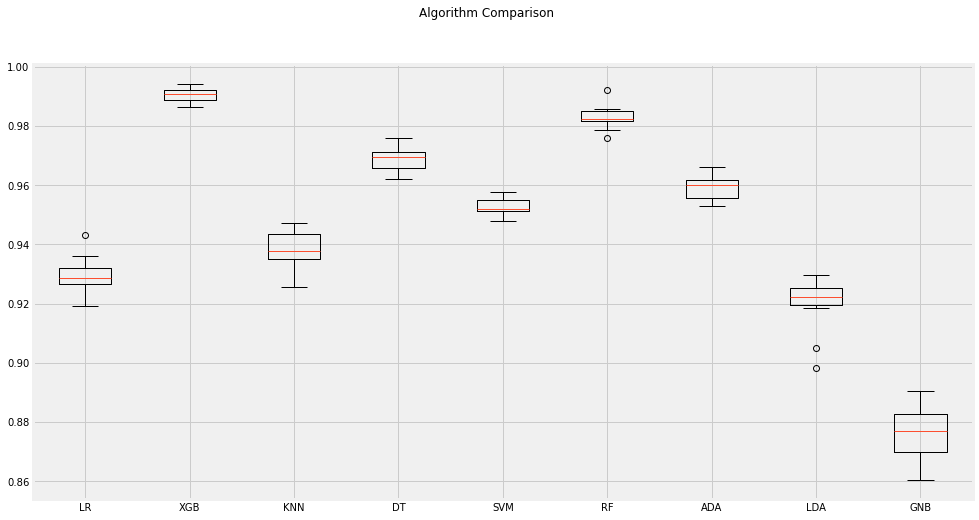

In [184]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

xgb1 = XGBClassifier()
logreg1= LogisticRegressionCV(solver='lbfgs', cv=10)
knn1 = KNeighborsClassifier(5)
svcl1 = SVC()
adb1 = AdaBoostClassifier()
dt1 = DecisionTreeClassifier(max_depth=5)
rf1 = RandomForestClassifier()
lda1 = LinearDiscriminantAnalysis()
gnb1 = GaussianNB()

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models1 = []
models1.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models1.append(('XGB', XGBClassifier()))
models1.append(('KNN', KNeighborsClassifier()))
models1.append(('DT', DecisionTreeClassifier()))
models1.append(('SVM', SVC(gamma='auto')))
models1.append(('RF', RandomForestClassifier(n_estimators=200)))
models1.append(('ADA', AdaBoostClassifier(n_estimators=200)))
models1.append(('LDA', LinearDiscriminantAnalysis()))
models1.append(('GNB', GaussianNB()))
              
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model1 in models1:
    kfold1 = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results1 = model_selection.cross_val_score(model1, X_train1, y_train1, cv=kfold1, scoring=scoring)
    results.append(cv_results1)
    names.append(name)
    msg1 = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg1)

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]              
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Hyper Parameter Tuning Random Forest Classifier  ( Balanced data )

In [185]:
# hyperparameters for RandomForestClassifier

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
bal_X, bal_y = make_blobs(n_samples=1000, centers=4, n_features=200, cluster_std=25)
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=4)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982895 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.980888 (0.003973) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.982829 (0.003515) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.982895 (0.003613) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.980172 (0.003672) with: {'max_features': 'log2', 'n_estimators': 10}
0.982829 (0.003469) with: {'max_features': 'log2', 'n_estimators': 100}
0.982882 (0.003499) with: {'max_features': 'log2', 'n_estimators': 1000}


# Deploying the model using Flask & Heroku

In [186]:
import pickle
file = open('rf_classifier1.pkl','wb')
pickle.dump(rf_classifier1,file)